In [1]:
import numpy  as np
import pandas as pd
import os
dir_path = os.getcwd()
project_dir_path = os.path.dirname(dir_path)

test_seq_path = project_dir_path + '/data/AMP/test_amp.csv'
random_seq_list = np.load(dir_path + '/AMP/random_seq1000.npy')
pretrain_seq_list = np.load(dir_path + '/AMP/pretrain_generate1000_mxlen20_topk500.npy')
finetune_seq_list = np.load(dir_path + '/AMP/finetune_E100_LR1e-06_BS32_ML200_generate_mxlen200_topk500.npy')
prefix_seq_list = np.load(dir_path + '/AMP/prefix_PREFIX_TUNING_CAUSAL_LM_E100_LR0.001_BS32_ML200_VT20_mxlen200_topk500.npy')

test_seq_csv = pd.read_csv(test_seq_path) 
test_seq_list = [test_seq_csv.iloc[i]['Sequence'].upper() for i in range(len(test_seq_csv))]
aa_list = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

def clean_seq_set(seq_list):
    new_seq_list = set()
    other_char_list = set()
    for i, seq in enumerate(seq_list):   
        seq = seq.replace('\n', '').replace('<|endoftext|>', '')
        seq = seq.replace(' ', '').upper()
        flag = False
        if len(seq) == 0:
            continue
        if len(seq) > 100:   # Remove sequences over 100
            continue
        for aa in seq:
            if aa not in aa_list:
                other_char_list.add(aa)
                flag = True
                break
        if flag:
            continue
        else:
            new_seq_list.add(seq)
    return list(new_seq_list)

test_seq_list = clean_seq_set(test_seq_list)
random_seq_list = clean_seq_set(random_seq_list)
pretrain_seq_list = clean_seq_set(pretrain_seq_list)
finetune_seq_list = clean_seq_set(finetune_seq_list)
prefix_seq_list = clean_seq_set(prefix_seq_list)

## Statistical amino acid distribution

In [2]:
def count_aa_num(seq_list):
    result = {'A': 0, 'R': 0, 'N': 0, 'D': 0, 'C': 0, 'E': 0,
              'Q': 0, 'G': 0, 'H': 0, 'I': 0, 'L': 0, 'K': 0, 'M': 0, 'F': 0, 'P': 0, 'S': 0,
              'T': 0, 'W': 0, 'Y': 0, 'V': 0}
    all_aa_num = sum([len(seq) for seq in seq_list])
    for aa in result.keys():
        for seq in seq_list:
            result[aa] += seq.count(aa)
    for aa in result.keys():
        result[aa] /= all_aa_num
    return result

In [3]:
test_seq_aa_num = count_aa_num(test_seq_list)
random_aa_num = count_aa_num(random_seq_list)
pretrain_aa_num = count_aa_num(pretrain_seq_list)
finetune_aa_num = count_aa_num(finetune_seq_list)
prefix_aa_num = count_aa_num(prefix_seq_list)

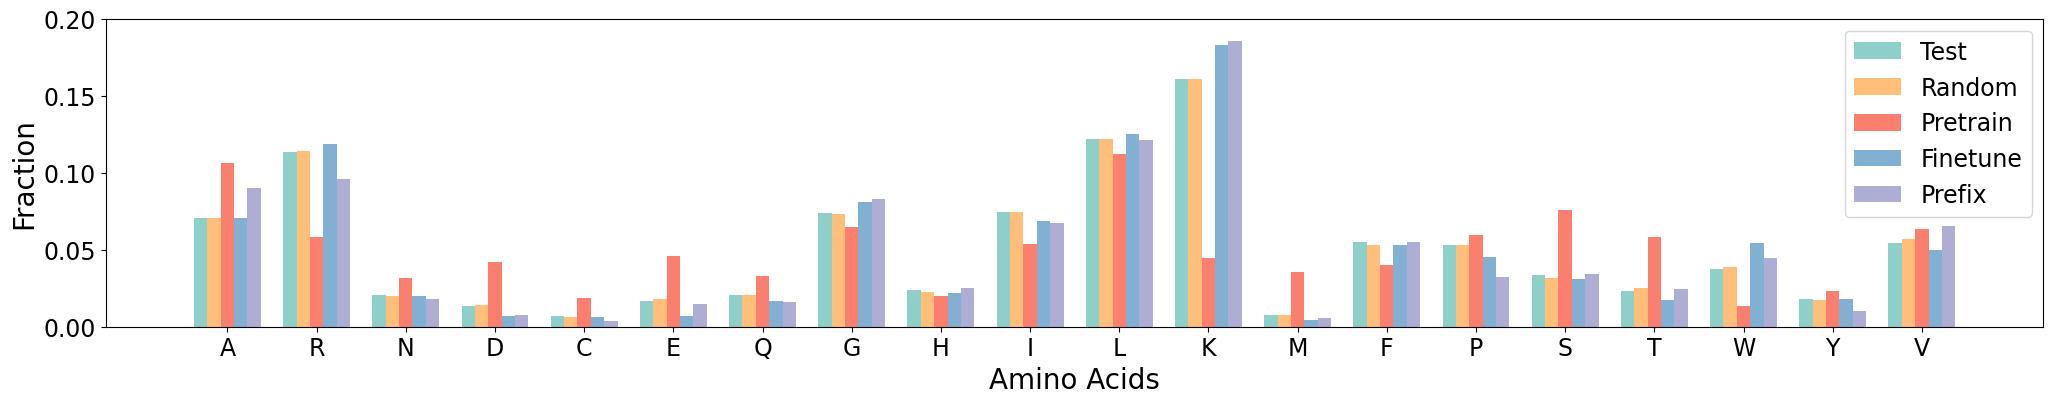

In [6]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_SCALE = ["#8ecfc9", "#ffbe7a", "#fa7f6f", '#82b0d2', '#aeadd3']
# COLOR_SCALE = ["#96cac1", "#f6f6b7", "#c1bed6", '#ea8e83', '#8aafc9']
     
aa_type = list(test_seq_aa_num.keys())
random_seq_aa_num_list = list(random_aa_num.values())
test_seq_aa_num_list = list(test_seq_aa_num.values())
pretrain_seq_aa_num_list = list(pretrain_aa_num.values())
prefix_aa_num_list = list(finetune_aa_num.values())
finetune_aa_num_list = list(prefix_aa_num.values())

fig = plt.figure(figsize=(25,4))
x = np.arange(len(aa_type))

plt.bar(x, test_seq_aa_num_list, width=0.15, color=COLOR_SCALE[0], tick_label=aa_type, label='Test')
plt.bar(x+0.15, random_seq_aa_num_list, width=0.15, color=COLOR_SCALE[1], label='Random')
plt.bar(x+0.3, pretrain_seq_aa_num_list, width=0.15, color=COLOR_SCALE[2], label='Pretrain', tick_label=aa_type)

plt.bar(x+0.45, prefix_aa_num_list, width=0.15,color=COLOR_SCALE[3], label='Finetune')
plt.bar(x+0.6, finetune_aa_num_list, width=0.15,color=COLOR_SCALE[4], label='Prefix')

plt.ylim(0, 0.20)  
plt.yticks([0, 0.05, 0.10, 0.15, 0.20])  
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17) 
plt.legend(fontsize=17)

plt.xlabel('Amino Acids', fontsize=20)
plt.ylabel('Fraction', fontsize=20)
plt.title("")
plt.show()

## Physicochemical properties Distribution

In [7]:
import sys
sys.path.append('..')
from utils import peptide_property as pp

# pretrain_seq_prop = pp.calculate_physchem_prop(pretrain_seq_list)
test_seq_prop = pp.calculate_physchem_prop(test_seq_list)
finetune_seq_prop = pp.calculate_physchem_prop(finetune_seq_list)
prefix_seq_prop = pp.calculate_physchem_prop(prefix_seq_list)
pretrain_seq_prop =  pp.calculate_physchem_prop(pretrain_seq_list)
random_seq_prop =  pp.calculate_physchem_prop(random_seq_list)

test_property_df = pd.DataFrame(test_seq_prop)
random_property_df = pd.DataFrame(random_seq_prop)
pretrain_property_df = pd.DataFrame(pretrain_seq_prop)
finetune_property_df = pd.DataFrame(finetune_seq_prop)
prefix_property_df = pd.DataFrame(prefix_seq_prop)

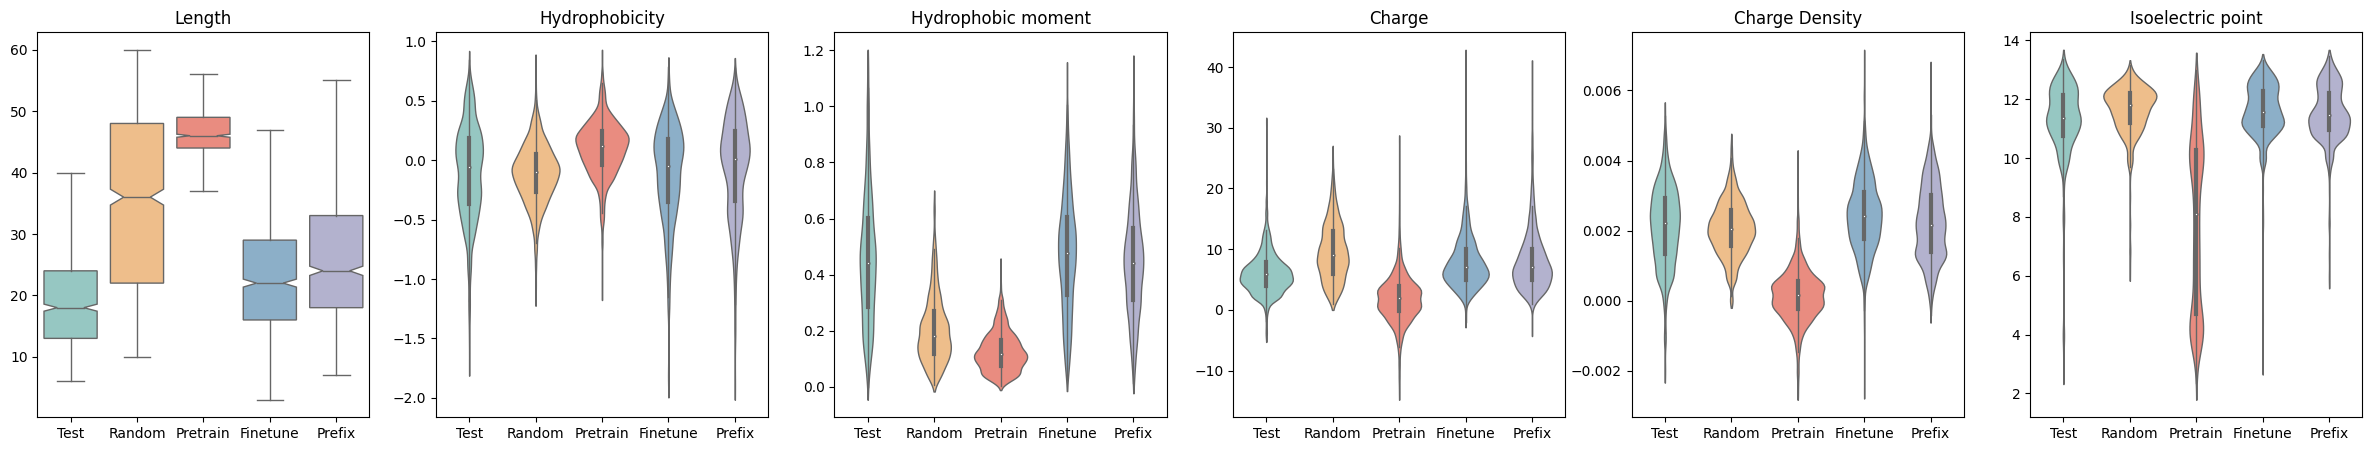

In [9]:
feature_all_list = ['Length', 'Hydrophobicity', 'Hydrophobic moment', 'Charge', 'Charge Density', 'Isoelectric point']
import seaborn as sns
from matplotlib import pyplot as plt
f = plt.figure(figsize=(30,5))
COLOR_SCALE = ["#8ecfc9", "#ffbe7a", "#fa7f6f", '#82b0d2', '#aeadd3']

for i, item in enumerate(feature_all_list):
    ax = plt.subplot(1,6, int(i+1))
    
    c = pd.DataFrame({'Test': test_property_df[item], 'Random':random_property_df[item], 'Pretrain':pretrain_property_df[item],  'Finetune': finetune_property_df[item], 'Prefix': prefix_property_df[item]})
    if item == 'Length':
        sns.boxplot(data=c, linewidth=1, notch=True,showfliers=False, palette=COLOR_SCALE)
    else:
        sns.violinplot(data=c, bw=.2, cut=1, linewidth=1, palette=COLOR_SCALE)
    plt.title(item)
plt.show()

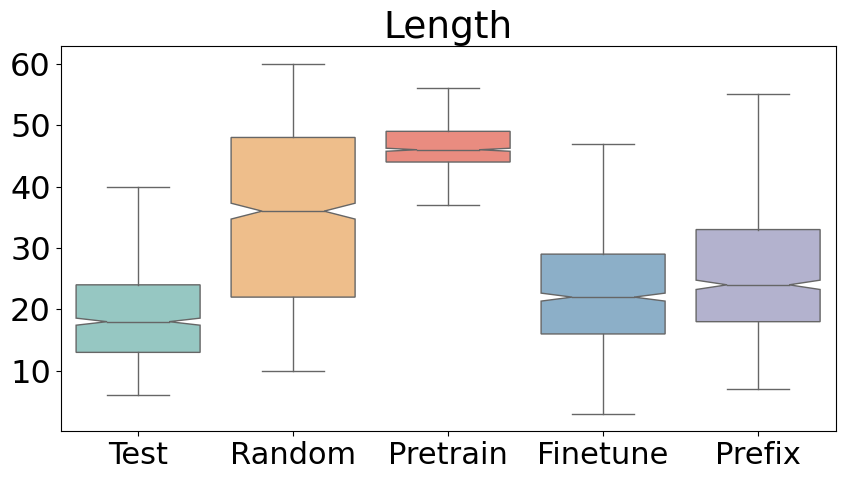

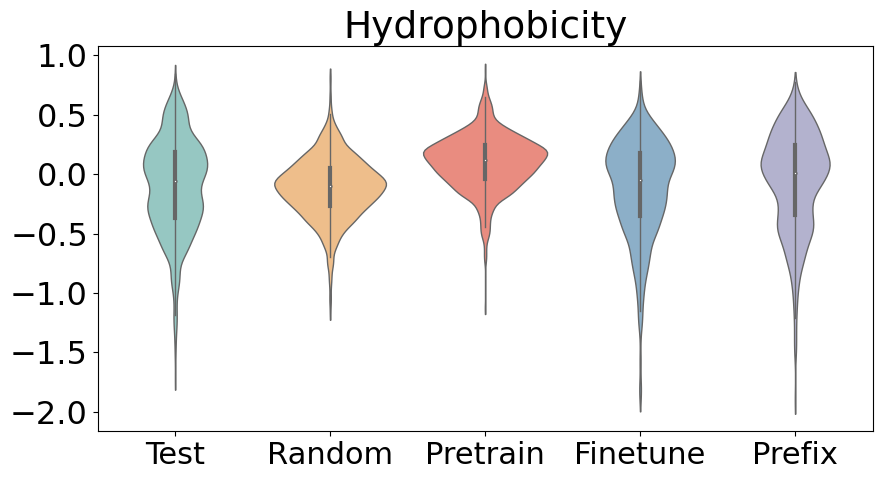

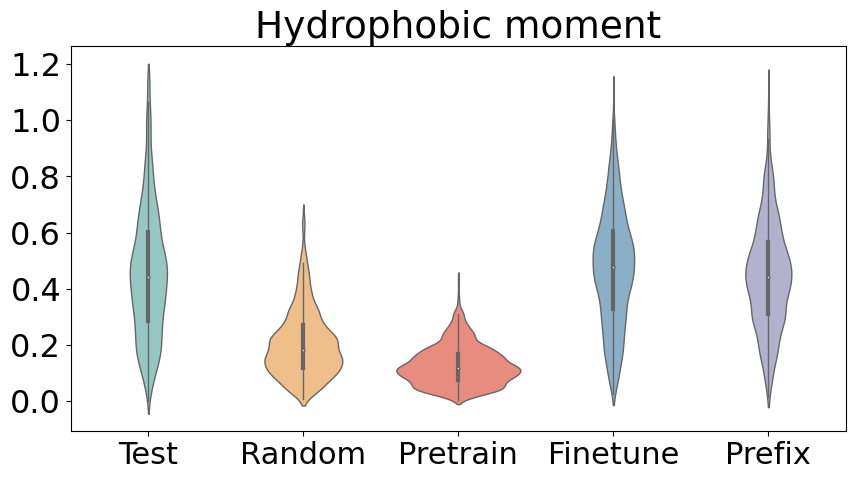

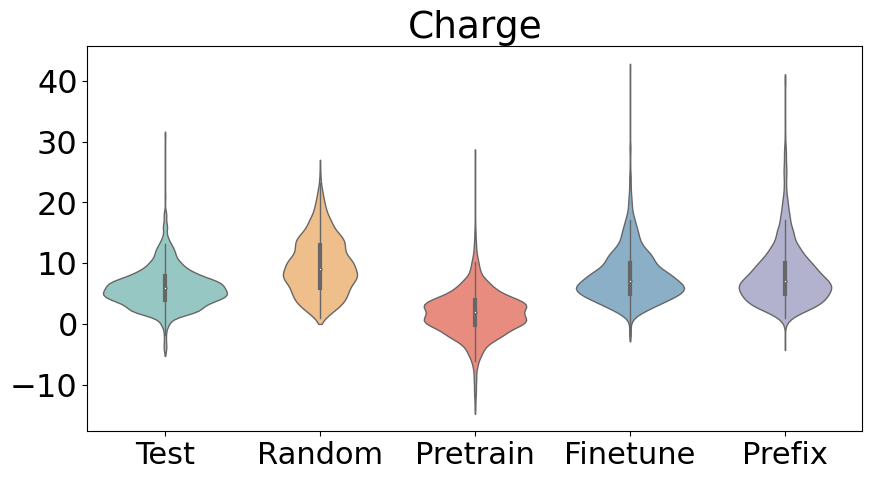

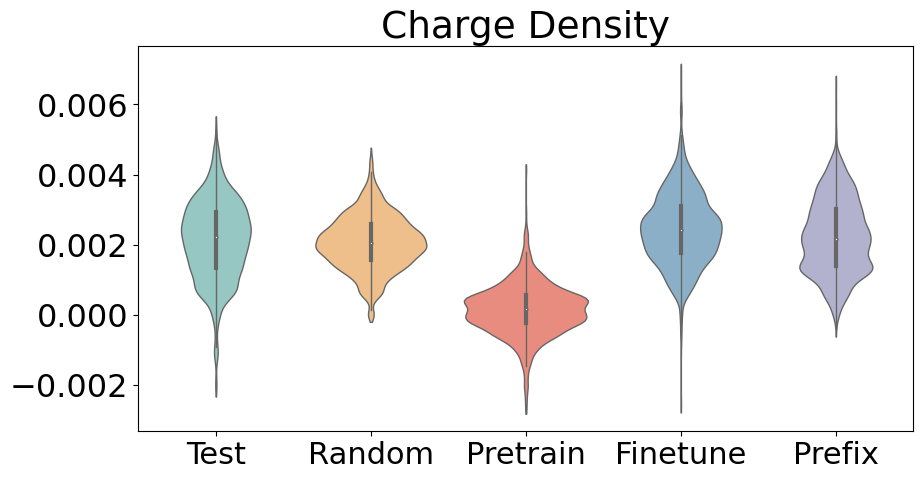

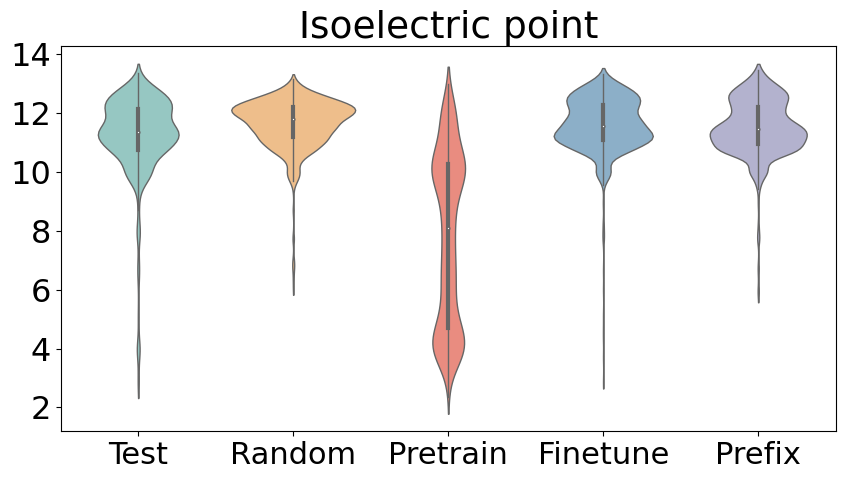

In [10]:
feature_all_list = ['Length', 'Hydrophobicity', 'Hydrophobic moment', 'Charge', 'Charge Density', 'Isoelectric point']

COLOR_SCALE = ["#8ecfc9", "#ffbe7a", "#fa7f6f", '#82b0d2', '#aeadd3']
import seaborn as sns
from matplotlib import pyplot as plt

for i, item in enumerate(feature_all_list):
    f = plt.figure(figsize=(10,5))
    c = pd.DataFrame({'Test': test_property_df[item], 'Random':random_property_df[item], 'Pretrain':pretrain_property_df[item],  'Finetune': finetune_property_df[item], 'Prefix': prefix_property_df[item]})
    if item == 'Length':
        sns.boxplot(data=c,palette=COLOR_SCALE, linewidth=1, notch=True,showfliers=False)
    else:
        sns.violinplot(data=c,palette=COLOR_SCALE, bw=.2, cut=1, linewidth=1)

    plt.xticks(fontsize=22)  # 设置x轴刻度字体大小
    plt.yticks(fontsize=23)  # 设置y轴刻度字体大小

    plt.title(feature_all_list[i], fontsize=27)
    plt.show()


# Comparing prefix tuning and other methods
LSTM, PepCVAE, Hydramp, prefix, finetune, test  <br>
The generated peptide sequences were predicted by AMP prediction webserver http://camp.bicnirrh.res.in/predict/

test 0.8250832408435095
finetune 0.8386538461538482
prefix 0.8617793964620218
pepcvae 0.7222100000000002
hydramp 0.6608000000000002
lstm 0.7341313131313149


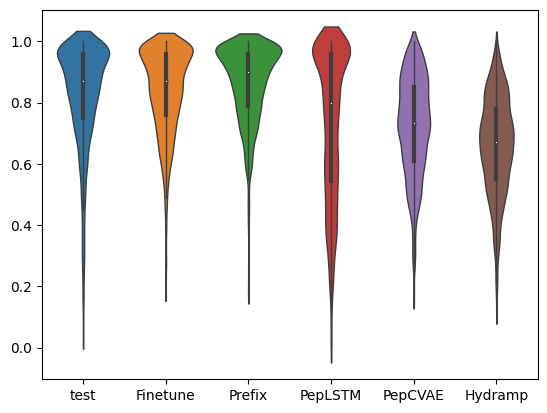

In [12]:
import numpy as np
import pandas as pd
import os
dir_path = os.getcwd()
project_dir_path = os.path.dirname(dir_path)

def get_pred(file_path):
    res = []
    with open(file_path) as f:
        for i, raw in enumerate(f.readlines()):
            if i == 0:
                continue
            res.append(float(raw.split('\t')[-1][:-1]))
    return res

test_pred_list = get_pred(dir_path + '/AMP/02-method_compare/test_pred.txt')
finetune_pred_list = get_pred(dir_path + '/AMP/02-method_compare/finetune_seq_pred.txt')
prefix_pred_list = get_pred(dir_path + '/AMP/02-method_compare/prefix_seq_pred.txt')
pepcvae_pred_list = get_pred(dir_path + '/AMP/02-method_compare/pepcvae_pred.txt')
hydramp_pred_list = get_pred(dir_path +'/AMP/02-method_compare/hydramp_pred.txt')
lstm_pred_list = get_pred(dir_path + '/AMP/02-method_compare/lstm_pred.txt')


print('test',sum(test_pred_list)/len(test_pred_list))
print('finetune',sum(finetune_pred_list)/len(finetune_pred_list))
print('prefix',sum(prefix_pred_list)/len(prefix_pred_list))
print('pepcvae',sum(pepcvae_pred_list)/len(pepcvae_pred_list))
print('hydramp',sum(hydramp_pred_list)/len(hydramp_pred_list))
print('lstm',sum(lstm_pred_list)/len(lstm_pred_list))

import seaborn as sns
from matplotlib import pyplot as plt

# c = pd.DataFrame({'Finetune': finetune_pred_list, 'Prefix': prefix_pred_list})
df = pd.DataFrame.from_dict({'test':test_pred_list ,'Finetune': finetune_pred_list, 'Prefix': prefix_pred_list, 'PepLSTM':lstm_pred_list, 'PepCVAE':pepcvae_pred_list, 'Hydramp':hydramp_pred_list}, orient='index')
df = df.transpose()
sns.violinplot(data=df, bw=.2, cut=1, linewidth=1)
plt.show()

# helical_wheel

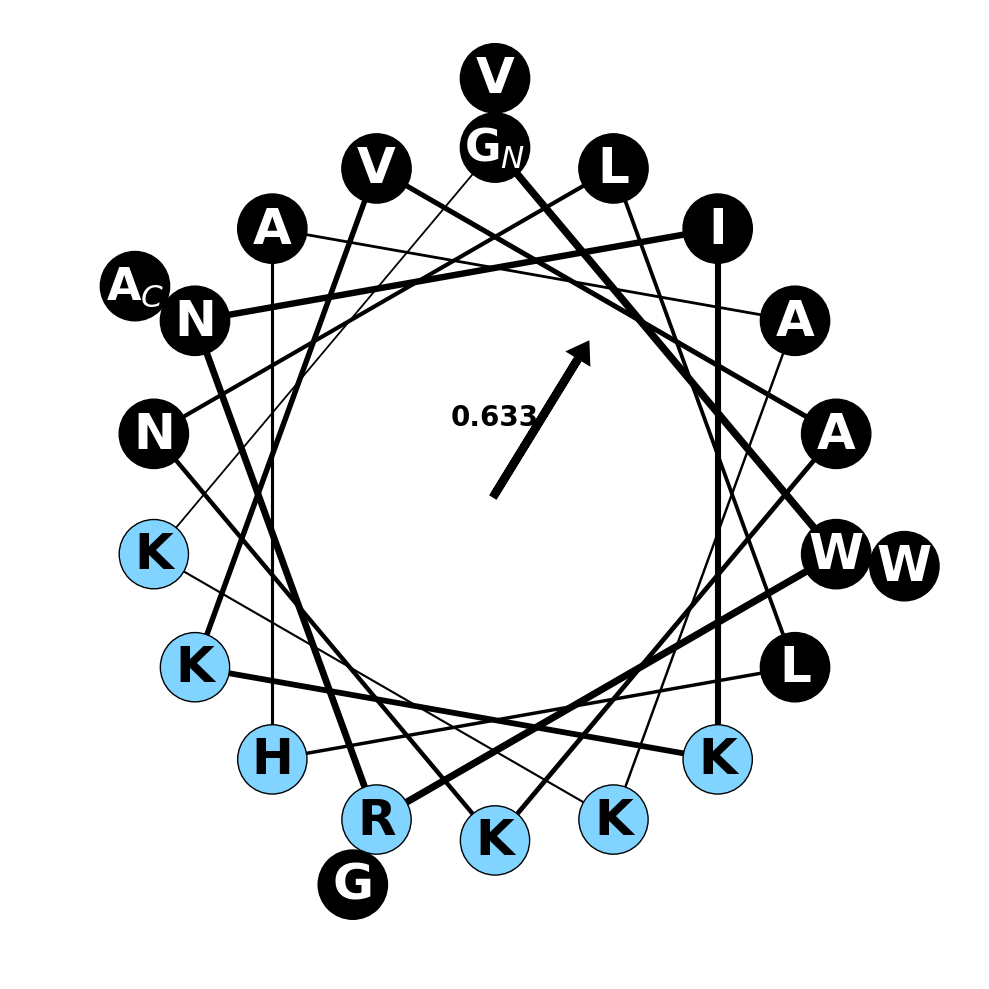

In [17]:
from modlamp.plot import helical_wheel
seq = 'GWRNIKKVAKNLLHAAKKVWGA'
helical_wheel(seq, colorcoding='charge', moment=True)

# FLPIVKKILSGLF
# FLPAIIKGLASILK
# GIASLLKKIPKIVSGIAKALKWLWRGSRN
# GWRNIKKVAKNLLHAAKKVWGA
# VNWKKILGPIVKGIANVAKGSISALNKY

# Combing prefix tokens

prefix_alpha_vt20_pred 0.4246062992125984
avg_prefix_alpha_amp_vt20_pred 0.6130108827085853
concat_prefix_amp_alpha_pred 0.5745100502512557
avg_prefix_alpha_init_vt20_pred 0.467765363128492
concat_prefix_init_alpha_pred 0.4216521739130435


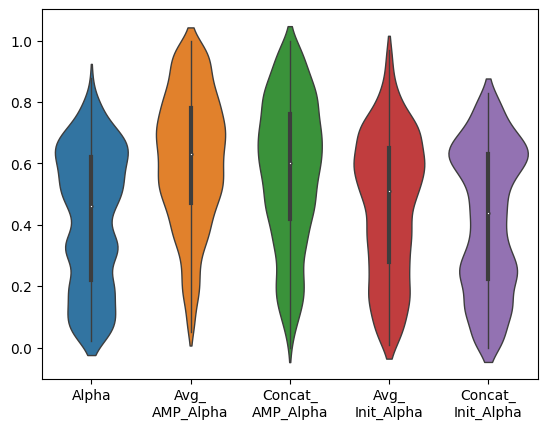

In [18]:
import numpy as np
import pandas as pd
import os
dir_path = os.getcwd()
project_dir_path = os.path.dirname(dir_path)

def get_pred(file_path):
    res = []
    with open(file_path) as f:
        for i, raw in enumerate(f.readlines()):
            if i == 0:
                continue
            res.append(float(raw.split('\t')[-1][:-1]))
    return res

prefix_alpha_vt20_pred_list = get_pred(dir_path + '/concat/prefix_alpha_vt20/prefix_alpha_vt20_pred.txt')
avg_prefix_alpha_amp_vt20_pred_list = get_pred(dir_path + '/concat/avg_prefix_alpha_amp_vt20/avg_prefix_alpha_amp_vt20_pred.txt')
concat_prefix_amp_alpha_pred_list = get_pred(dir_path + '/concat/concat_prefix_amp_alpha/concat_prefix_amp_alpha_pred.txt')
avg_prefix_alpha_init_vt20_pred_list = get_pred(dir_path + '/concat/avg_prefix_alpha_init_vt20/avg_prefix_alpha_init_vt20_pred.txt')
concat_prefix_init_alpha_pred_list = get_pred(dir_path + '/concat/concat_prefix_init_alpha/concat_prefix_init_alpha_pred.txt')

print('prefix_alpha_vt20_pred',sum(prefix_alpha_vt20_pred_list)/len(prefix_alpha_vt20_pred_list))
print('avg_prefix_alpha_amp_vt20_pred',sum(avg_prefix_alpha_amp_vt20_pred_list)/len(avg_prefix_alpha_amp_vt20_pred_list))
print('concat_prefix_amp_alpha_pred',sum(concat_prefix_amp_alpha_pred_list)/len(concat_prefix_amp_alpha_pred_list))
print('avg_prefix_alpha_init_vt20_pred',sum(avg_prefix_alpha_init_vt20_pred_list)/len(avg_prefix_alpha_init_vt20_pred_list))
print('concat_prefix_init_alpha_pred',sum(concat_prefix_init_alpha_pred_list)/len(concat_prefix_init_alpha_pred_list))

import seaborn as sns
from matplotlib import pyplot as plt

df = pd.DataFrame.from_dict({'Alpha':prefix_alpha_vt20_pred_list, 'Avg_\nAMP_Alpha': avg_prefix_alpha_amp_vt20_pred_list , 'Concat_\nAMP_Alpha':concat_prefix_amp_alpha_pred_list, 'Avg_\nInit_Alpha':avg_prefix_alpha_init_vt20_pred_list , 'Concat_\nInit_Alpha':concat_prefix_init_alpha_pred_list}, orient='index')


df = df.transpose()
sns.violinplot(data=df, bw=.2, cut=1, linewidth=1)
plt.show()